# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from tqdm import tqdm_notebook

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [143]:
# List for storing Latitude and Longitude
lat_lngs = []
cities = []

# Store today's date
current_date = pd.to_datetime('today').strftime('%m/%d/%Y')

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [144]:
# Set project variables
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
counter = 1
sett = 1
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Read each city name, pass it to the api and collect data for the respective city
for city in tqdm_notebook(cities):      
    
    try: 
        print(f"Processing Record {counter} of set {sett} | {city}")
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
    
    except:
        print("City not found. Skipping..." + city)
    
    if counter <50:
        counter= counter + 1   
    else:
        counter = 1
        sett = sett + 1

Processing Record 1 of set 1 | mataura
Processing Record 2 of set 1 | souillac
Processing Record 3 of set 1 | hilo
Processing Record 4 of set 1 | tsihombe
City not found. Skipping...tsihombe
Processing Record 5 of set 1 | bredasdorp
Processing Record 6 of set 1 | ribeira grande
Processing Record 7 of set 1 | ushuaia
Processing Record 8 of set 1 | aklavik
Processing Record 9 of set 1 | pisco
Processing Record 10 of set 1 | atikokan
Processing Record 11 of set 1 | qaanaaq
Processing Record 12 of set 1 | florianopolis
Processing Record 13 of set 1 | east london
Processing Record 14 of set 1 | fortuna
Processing Record 15 of set 1 | gumdag
Processing Record 16 of set 1 | busselton
Processing Record 17 of set 1 | arraial do cabo
Processing Record 18 of set 1 | hobyo
Processing Record 19 of set 1 | severo-kurilsk
Processing Record 20 of set 1 | albany
Processing Record 21 of set 1 | deputatskiy
Processing Record 22 of set 1 | hithadhoo
Processing Record 23 of set 1 | longyearbyen
Processing 

Processing Record 35 of set 4 | nikolskoye
Processing Record 36 of set 4 | solsvik
City not found. Skipping...solsvik
Processing Record 37 of set 4 | emerald
Processing Record 38 of set 4 | pacific grove
Processing Record 39 of set 4 | sao joao da barra
Processing Record 40 of set 4 | bathsheba
Processing Record 41 of set 4 | sur
Processing Record 42 of set 4 | baker city
Processing Record 43 of set 4 | tual
Processing Record 44 of set 4 | sungairaya
Processing Record 45 of set 4 | puerto escondido
Processing Record 46 of set 4 | prince rupert
Processing Record 47 of set 4 | carnarvon
Processing Record 48 of set 4 | mujiayingzi
Processing Record 49 of set 4 | fare
Processing Record 50 of set 4 | saleaula
City not found. Skipping...saleaula
Processing Record 1 of set 5 | manggar
Processing Record 2 of set 5 | sindand
City not found. Skipping...sindand
Processing Record 3 of set 5 | shurugwi
Processing Record 4 of set 5 | itarema
Processing Record 5 of set 5 | khani
Processing Record 6 o

Processing Record 18 of set 8 | tarakan
Processing Record 19 of set 8 | chapais
Processing Record 20 of set 8 | manacapuru
Processing Record 21 of set 8 | calabozo
Processing Record 22 of set 8 | maslova pristan
Processing Record 23 of set 8 | katangli
Processing Record 24 of set 8 | khandyga
Processing Record 25 of set 8 | bambous virieux
Processing Record 26 of set 8 | svetlyy
City not found. Skipping...svetlyy
Processing Record 27 of set 8 | pauini
Processing Record 28 of set 8 | puerto rondon
Processing Record 29 of set 8 | mahibadhoo
Processing Record 30 of set 8 | dingle
Processing Record 31 of set 8 | camana
City not found. Skipping...camana
Processing Record 32 of set 8 | paragominas
Processing Record 33 of set 8 | grand-santi
Processing Record 34 of set 8 | tarko-sale
Processing Record 35 of set 8 | gamba
Processing Record 36 of set 8 | dvinskoy
Processing Record 37 of set 8 | srednekolymsk
Processing Record 38 of set 8 | jasper
Processing Record 39 of set 8 | marcona
City not

Processing Record 5 of set 12 | glens falls
Processing Record 6 of set 12 | bolobo
Processing Record 7 of set 12 | lianzhou
Processing Record 8 of set 12 | richard toll
City not found. Skipping...richard toll
Processing Record 9 of set 12 | nenjiang
Processing Record 10 of set 12 | rio gallegos
Processing Record 11 of set 12 | tromso
Processing Record 12 of set 12 | cooma
Processing Record 13 of set 12 | boende
Processing Record 14 of set 12 | asmara
Processing Record 15 of set 12 | bosaso
Processing Record 16 of set 12 | sorland
Processing Record 17 of set 12 | dzilam gonzalez
Processing Record 18 of set 12 | quzhou
Processing Record 19 of set 12 | leningradskiy
Processing Record 20 of set 12 | haibowan
City not found. Skipping...haibowan
Processing Record 21 of set 12 | nongstoin
Processing Record 22 of set 12 | bobo dioulasso
City not found. Skipping...bobo dioulasso
Processing Record 23 of set 12 | visnes
Processing Record 24 of set 12 | teahupoo
Processing Record 25 of set 12 | lu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
#Create a dataframe for the Cities data
cities_df = pd.DataFrame({'City':city_name,'Cloudiness':cloudiness, 'Country':country,
                          'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,
                          'Max Temp':max_temp,'Wind Speed':wind_speed})
#Display the Dataframe
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Narasaraopet,100,IN,1563923009,80,16.24,80.05,79.87,3.02
1,Rosita,100,NI,1563923009,94,13.92,-84.40,75.19,1.43
2,San Ramon,40,NI,1563923009,61,12.92,-85.84,80.60,4.70
3,Ushuaia,40,AR,1563923009,74,-54.81,-68.31,33.80,18.34
4,Bluff,0,AU,1563923009,50,-23.58,149.07,68.17,3.53


In [157]:
#Export the city data into a .csv.
cities_df.to_csv('city_weather_data.csv',index=False)

#cities_df[cities_df['Humidity'] > 100].head()

#Display Cities
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Narasaraopet,100,IN,1563923009,80,16.24,80.05,79.87,3.02
1,Rosita,100,NI,1563923009,94,13.92,-84.40,75.19,1.43
2,San Ramon,40,NI,1563923009,61,12.92,-85.84,80.60,4.70
3,Ushuaia,40,AR,1563923009,74,-54.81,-68.31,33.80,18.34
4,Bluff,0,AU,1563923009,50,-23.58,149.07,68.17,3.53


In [135]:
#Find the Range of Latitudes. Describe the dataset
from scipy import stats

# Calculate the range of latitudes do determine if the dataset is all grouped in the same region
min_lat = min(cities_df['Lat'])
max_lat = max(cities_df['Lat'])
range_lat = max_lat - min_lat

#Display range,mean and mode of the dataset latitudes
print("The range of Latitudes for this analysis is: " + str(range_lat))
print("Median value of Latitudes is: " + str(np.median(cities_df['Lat'])))
print("Mode value of Latitudes is: " + str(stats.mode(cities_df['Lat'])[0]))

# Describe the dataset
cities_df['Lat'].describe()

The range of Latitudes for this analysis is: 133.03
Median value of Latitudes is: 20.96
Mode value of Latitudes is: [-17.73]


count    571.000000
mean      19.480158
std       33.181208
min      -54.810000
25%       -7.705000
50%       20.960000
75%       48.135000
max       78.220000
Name: Lat, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

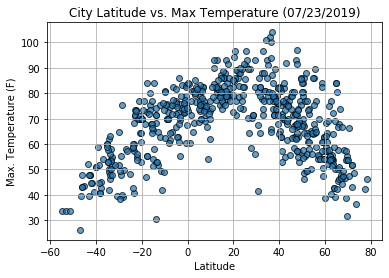

In [136]:
#Store X and Y axis
lat_df = cities_df['Lat']
max_temp_df = cities_df['Max Temp']

#Calculate scatterplot
fig, ax = plt.subplots()
ax.scatter(lat_df, max_temp_df,
            edgecolor="black",label="City Temperature v Latitude",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Max Temperature (" + current_date + ")")
ax.set_ylabel("Max. Temperature (F)")
ax.set_xlabel("Latitude")
fig.savefig("Plot_CityLatitude_v_MaxTemperature.png",bbox_inches="tight",dpi = 150)
plt.show()


#### Latitude vs. Humidity Plot

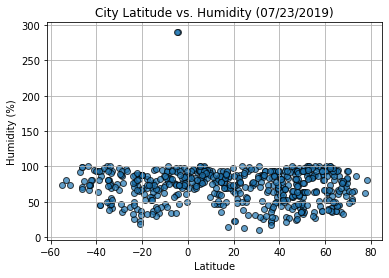

In [137]:
# Store x and y axis
humidity_df = cities_df['Humidity']

#Calculate Scatterplot
fig, ax = plt.subplots()
ax.scatter(lat_df, humidity_df,
            edgecolor="black",label="City Latitude v Humidity",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Humidity (" + current_date + ")")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
fig.savefig("Plot_CityLatitude_v_Humidity.png",bbox_inches="tight",dpi = 150)
plt.show()


#### Latitude vs. Cloudiness Plot

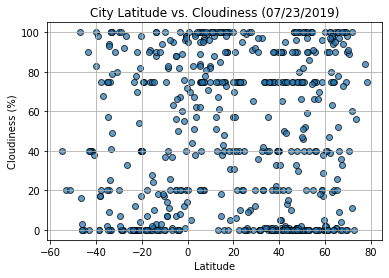

In [138]:
#Store x and y axis
cloudiness_df = cities_df['Cloudiness']

#Calculate ScatterPlot
fig, ax = plt.subplots()
ax.scatter(lat_df, cloudiness_df,
            edgecolor="black",label="City Latitude v Cloudiness",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Cloudiness (" + current_date + ")")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
fig.savefig("Plot_CityLatitude_v_Cloudiness.png",bbox_inches="tight",dpi = 150)
plt.show()

#### Latitude vs. Wind Speed Plot

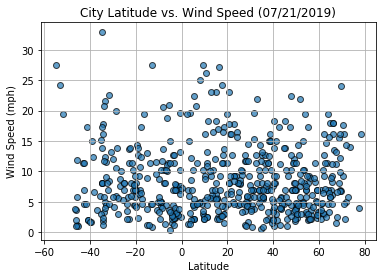

In [124]:
#Store x and y axis
wind_speed_df = cities_df['Wind Speed']

#Calculate scatterplot
fig, ax = plt.subplots()
ax.scatter(lat_df, wind_speed_df,
            edgecolor="black",label="City Latitude v Wind Speed",marker='o', alpha=0.7)
ax.grid()
ax.set_title("City Latitude vs. Wind Speed (" + current_date + ")")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
fig.savefig("Plot_CityLatitude_v_WindSpeed.png",bbox_inches="tight",dpi = 150)
plt.show()